# Project: Investigate a Dataset (TMDb Movie Data)

###### By Karim El-Dweky

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Data-Wrangling" data-toc-modified-id="Data-Wrangling-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Wrangling</a></span><ul class="toc-item"><li><span><a href="#Data-Gathering" data-toc-modified-id="Data-Gathering-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Data Gathering</a></span></li><li><span><a href="#Data-Assessment" data-toc-modified-id="Data-Assessment-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Data Assessment</a></span><ul class="toc-item"><li><span><a href="#Visual-Assessment" data-toc-modified-id="Visual-Assessment-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Visual Assessment</a></span></li><li><span><a href="#Programmatic-Assessment" data-toc-modified-id="Programmatic-Assessment-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Programmatic Assessment</a></span></li><li><span><a href="#Data-Assessment-Report" data-toc-modified-id="Data-Assessment-Report-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Data Assessment Report</a></span><ul class="toc-item"><li><span><a href="#Quality-Issues:" data-toc-modified-id="Quality-Issues:-2.2.3.1"><span class="toc-item-num">2.2.3.1&nbsp;&nbsp;</span>Quality Issues:</a></span></li><li><span><a href="#Tideness-Issues:" data-toc-modified-id="Tideness-Issues:-2.2.3.2"><span class="toc-item-num">2.2.3.2&nbsp;&nbsp;</span>Tideness Issues:</a></span></li></ul></li></ul></li><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Data Cleaning</a></span><ul class="toc-item"><li><span><a href="#Taking-a-copy-for-cleaning-process:" data-toc-modified-id="Taking-a-copy-for-cleaning-process:-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Taking a copy for cleaning process:</a></span></li><li><span><a href="#Cleaning-Quality-Issues:" data-toc-modified-id="Cleaning-Quality-Issues:-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Cleaning Quality Issues:</a></span></li><li><span><a href="#Cleaning-Tideness-Issues:" data-toc-modified-id="Cleaning-Tideness-Issues:-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Cleaning Tideness Issues:</a></span></li></ul></li><li><span><a href="#Data-Storing" data-toc-modified-id="Data-Storing-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Data Storing</a></span></li></ul></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Research-Question-1-(Important-Insights-for-Movie-Production)" data-toc-modified-id="Research-Question-1-(Important-Insights-for-Movie-Production)-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Research Question 1 (Important Insights for Movie Production)</a></span><ul class="toc-item"><li><span><a href="#Which-genre-has-the-highest-release-of-movies?" data-toc-modified-id="Which-genre-has-the-highest-release-of-movies?-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Which genre has the highest release of movies?</a></span><ul class="toc-item"><li><span><a href="#Findings" data-toc-modified-id="Findings-3.1.1.1"><span class="toc-item-num">3.1.1.1&nbsp;&nbsp;</span>Findings</a></span></li></ul></li><li><span><a href="#Who-are-the-directors-contributing-to-high-revenue-movies?" data-toc-modified-id="Who-are-the-directors-contributing-to-high-revenue-movies?-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Who are the directors contributing to high revenue movies?</a></span><ul class="toc-item"><li><span><a href="#Findings" data-toc-modified-id="Findings-3.1.2.1"><span class="toc-item-num">3.1.2.1&nbsp;&nbsp;</span>Findings</a></span></li></ul></li></ul></li><li><span><a href="#Research-Question-2--(Important-Insights-for-Movie-Financing)" data-toc-modified-id="Research-Question-2--(Important-Insights-for-Movie-Financing)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Research Question 2  (Important Insights for Movie Financing)</a></span><ul class="toc-item"><li><span><a href="#What's-the-Changes-in-Budget-&amp;-Revenue-across-Time?" data-toc-modified-id="What's-the-Changes-in-Budget-&amp;-Revenue-across-Time?-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>What's the Changes in Budget &amp; Revenue across Time?</a></span><ul class="toc-item"><li><span><a href="#Findings" data-toc-modified-id="Findings-3.2.1.1"><span class="toc-item-num">3.2.1.1&nbsp;&nbsp;</span>Findings</a></span></li></ul></li><li><span><a href="#What's-the-most-profitable-genre?" data-toc-modified-id="What's-the-most-profitable-genre?-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>What's the most profitable genre?</a></span><ul class="toc-item"><li><span><a href="#Findings" data-toc-modified-id="Findings-3.2.2.1"><span class="toc-item-num">3.2.2.1&nbsp;&nbsp;</span>Findings</a></span></li></ul></li></ul></li><li><span><a href="#Research-Question-3-(Important-Insights-for-Movies-Watching)" data-toc-modified-id="Research-Question-3-(Important-Insights-for-Movies-Watching)-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Research Question 3 (Important Insights for Movies Watching)</a></span><ul class="toc-item"><li><span><a href="#Does-movies-ppopularity-affected-through-the-years?" data-toc-modified-id="Does-movies-ppopularity-affected-through-the-years?-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Does movies ppopularity affected through the years?</a></span><ul class="toc-item"><li><span><a href="#Findings" data-toc-modified-id="Findings-3.3.1.1"><span class="toc-item-num">3.3.1.1&nbsp;&nbsp;</span>Findings</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Conclusions</a></span><ul class="toc-item"><li><span><a href="#Findings" data-toc-modified-id="Findings-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Findings</a></span></li></ul></li></ul></div>

## Introduction

The purpose of this project is to put in practice what I learned in data wrangling data section from Udacity Data Analysis Nanodegree program. The dataset that is wrangled contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

In [207]:
# importing required libraries 
import pandas as pd
import numpy as np
import requests
import re
import matplotlib.pyplot as plt
import datetime
import os
import seaborn as sns
from scipy import stats
from functools import reduce
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Data Wrangling

### Data Gathering
Kaggle have removed the original version of this dataset per a DMCA takedown request from IMDB. In order to minimize the impact, They're replacing it with a similar set of films and data fields from The Movie Database (TMDb) in accordance with their terms of use.
- **TMDb Movie Data**
    - This file (tmdb-movies.csv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv.
    - The file is cleaned from original data on https://www.kaggle.com/tmdb/tmdb-movie-metadata.


In [208]:
# Function definition for dataset download
def request_file(url):
    file_name = os.path.basename(url)
    response = requests.get(url)
    # save content of response in the file
    if not os.path.isfile(file_name):
        with open(file_name,'wb') as f:
            f.write(response.content)
    return file_name

In [209]:
# URL downloaded programatically 
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv"
file_name = request_file(url)

# Read CSV file
tmdb_df = pd.read_csv(file_name)
tmdb_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Data Assessment 
Data Assessment consists of two main steps (Visual - Programmatic) which help in exploring the gathered data and finding the anamolies points that needs to be cleaned. 

#### Visual Assessment

In [210]:
tmdb_df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


#### Programmatic Assessment

In [211]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [212]:
tmdb_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [213]:
sum(tmdb_df['id'].duplicated())

1

In [214]:
tmdb_df[tmdb_df['id'].duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [215]:
tmdb_df.popularity.value_counts()

0.109305    2
0.114027    2
0.126182    2
0.247926    2
0.410235    2
           ..
0.645437    1
0.088796    1
0.155075    1
0.596755    1
0.234375    1
Name: popularity, Length: 10814, dtype: int64

In [216]:
len(tmdb_df[tmdb_df['popularity'] <= 1])

9110

In [217]:
len(tmdb_df[tmdb_df['popularity'] > 1])

1756

In [218]:
tmdb_df.popularity.sum()

7024.227383999999

In [219]:
tmdb_df.vote_average.value_counts()

6.1    496
6.0    495
5.8    486
5.9    473
6.2    464
      ... 
8.9      1
8.6      1
9.2      1
8.7      1
2.0      1
Name: vote_average, Length: 72, dtype: int64

In [220]:
len(tmdb_df[tmdb_df['vote_average'] <= 5.97])

5056

In [221]:
len(tmdb_df[tmdb_df['vote_average'] > 5.97])

5810

In [222]:
len(tmdb_df[tmdb_df['vote_average'] == 0])

0

In [223]:
tmdb_df.sample(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
193,288036,tt3165612,0.758133,0,3214116,Sleeping with Other People,Jason Sudeikis|Alison Brie|Adam Scott|Natasha ...,NaN,Leslye Headland,A romantic comedy with commitment issues.,...,Can two serial cheaters get a second chance at...,100,Comedy,Sidney Kimmel Entertainment|Gary Sanchez Produ...,6/26/15,197,6.2,2015,0.000000e+00,2.956985e+06
8455,32047,tt0082945,0.254886,0,0,Prince of the City,Treat Williams|Jerry Orbach|Richard Foronjy|Do...,NaN,Sidney Lumet,A cop is turning. Nobody's safe.,...,New York City detective Daniel Ciello agrees t...,167,Drama|Thriller|Crime,Orion Pictures Corporation,8/20/81,17,6.6,1981,0.000000e+00,0.000000e+00
2921,2309,tt0494238,1.380024,60000000,57490374,Inkheart,Brendan Fraser|Sienna Guillory|Andy Serkis|Eli...,http://www.inkheartmovie.com/,Iain Softley,Every story ever written is just waiting to be...,...,The adventures of a father and his young daugh...,106,Adventure|Family|Fantasy,New Line Cinema|Internationale Filmproduktion ...,12/11/08,302,5.8,2008,6.076720e+07,5.822548e+07
4550,84200,tt1996264,0.518403,850000,1243961,"For a Good Time, Call...",Ari Graynor|Lauren Miller|Mark Webber|Justin L...,NaN,Jamie Travis,Lose your hang-ups. Find your calling.,...,"College ""frenemies"" Lauren and Katie move in t...",85,Comedy,AdScott Pictures,8/31/12,69,5.8,2012,8.072826e+05,1.181445e+06
2411,14,tt0169547,3.555720,15000000,356296601,American Beauty,Kevin Spacey|Annette Bening|Thora Birch|Wes Be...,http://www.dreamworks.com/ab/,Sam Mendes,Look closer.,...,"Lester Burnham, a depressed suburban father in...",122,Drama,DreamWorks SKG|Jinks/Cohen Company,9/15/99,1756,7.7,1999,1.963579e+07,4.664111e+08


In [224]:
tmdb_df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [225]:
len(tmdb_df[tmdb_df['budget_adj'] == 0])

5696

In [226]:
len(tmdb_df[tmdb_df['revenue_adj'] == 0])

6016

In [227]:
len(tmdb_df[tmdb_df['budget'] == 0])

5696

In [228]:
len(tmdb_df[tmdb_df['revenue'] == 0])

6016

In [229]:
tmdb_df.isin([0]).sum()

id                         0
imdb_id                    0
popularity                 0
budget                  5696
revenue                 6016
original_title             0
cast                       0
homepage                   0
director                   0
tagline                    0
keywords                   0
overview                   0
runtime                   31
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj              5696
revenue_adj             6016
dtype: int64

#### Data Assessment Report

##### Quality Issues:

   1. Dropping Dublicated **id**.
   2. Dropping unneeded columns.
   3. Converting zeros in **budget_adj** & **revenue_adj** to np-NaN.
   4. Dropping all rows with Nan Values except **revenue_adj**.
   5. Converting **release_date** from object into datetime.

##### Tideness Issues:

   6. Separate **release_date** into **release_day**, **release_month** and **release_year** (3 columns) and Dropping **release_date**.

### Data Cleaning

#### Taking a copy for cleaning process:

In [230]:
tmdb_df_cleaned = tmdb_df.copy()

#### Cleaning Quality Issues:

###### 1. Define

Dropping Dublicated **id**.

###### Code

In [231]:
# sorting by id 
tmdb_df_cleaned.sort_values('id', inplace = True) 
  
# dropping ALL duplicates values 
tmdb_df_cleaned.drop_duplicates(subset ='id', 
                     keep = False, inplace = True) 

###### Test

In [232]:
sum(tmdb_df_cleaned['id'].duplicated())

0

###### 2. Define

Dropping unneeded columns.

###### Code

In [233]:
# Dropping (imdb_id, budget, revenue, homepage, tagline, keywords, overview, release_year) coloumns 

unneeded_coulmns = ['imdb_id',
                    'budget',
                    'revenue',
                    'homepage',
                    'tagline',
                    'keywords',
                    'overview',
                    'release_year']

tmdb_df_cleaned.drop(unneeded_coulmns, axis=1, inplace=True)

###### Test

In [234]:
tmdb_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10864 entries, 8088 to 3460
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10864 non-null  int64  
 1   popularity            10864 non-null  float64
 2   original_title        10864 non-null  object 
 3   cast                  10788 non-null  object 
 4   director              10820 non-null  object 
 5   runtime               10864 non-null  int64  
 6   genres                10841 non-null  object 
 7   production_companies  9834 non-null   object 
 8   release_date          10864 non-null  object 
 9   vote_count            10864 non-null  int64  
 10  vote_average          10864 non-null  float64
 11  budget_adj            10864 non-null  float64
 12  revenue_adj           10864 non-null  float64
dtypes: float64(4), int64(3), object(6)
memory usage: 1.2+ MB


###### 3. Define

Converting zeros in **budget_adj** & **revenue_adj** to np-NaN.

###### Code

In [235]:
# Converting zeros in budget_adj to np-NaN
tmdb_df_cleaned['budget_adj'].replace(0, np.nan, inplace = True)
  
# Converting zeros in revenue_adj to np-NaN
tmdb_df_cleaned['revenue_adj'].replace(0, np.nan, inplace = True)

###### Test

In [236]:
tmdb_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10864 entries, 8088 to 3460
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10864 non-null  int64  
 1   popularity            10864 non-null  float64
 2   original_title        10864 non-null  object 
 3   cast                  10788 non-null  object 
 4   director              10820 non-null  object 
 5   runtime               10864 non-null  int64  
 6   genres                10841 non-null  object 
 7   production_companies  9834 non-null   object 
 8   release_date          10864 non-null  object 
 9   vote_count            10864 non-null  int64  
 10  vote_average          10864 non-null  float64
 11  budget_adj            5168 non-null   float64
 12  revenue_adj           4848 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 1.2+ MB


###### 4. Define

Dropping all rows with Nan Values except **revenue_adj**.

###### Code

In [237]:
# Dropping all rows with Nan Values except revenue_adj.
tmdb_df_cleaned.dropna(subset=[n for n in tmdb_df_cleaned if n != 'revenue_adj'], inplace = True)

###### Test

In [238]:
tmdb_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 8088 to 3460
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5020 non-null   int64  
 1   popularity            5020 non-null   float64
 2   original_title        5020 non-null   object 
 3   cast                  5020 non-null   object 
 4   director              5020 non-null   object 
 5   runtime               5020 non-null   int64  
 6   genres                5020 non-null   object 
 7   production_companies  5020 non-null   object 
 8   release_date          5020 non-null   object 
 9   vote_count            5020 non-null   int64  
 10  vote_average          5020 non-null   float64
 11  budget_adj            5020 non-null   float64
 12  revenue_adj           3804 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 549.1+ KB


###### 5. Define

Converting **release_date** coloumn from object into datetime.

###### Code

In [239]:
# Converting from object into datetime

tmdb_df_cleaned['release_date'] =  pd.to_datetime(tmdb_df_cleaned['release_date'], infer_datetime_format=True)

###### Test

In [240]:
tmdb_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 8088 to 3460
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    5020 non-null   int64         
 1   popularity            5020 non-null   float64       
 2   original_title        5020 non-null   object        
 3   cast                  5020 non-null   object        
 4   director              5020 non-null   object        
 5   runtime               5020 non-null   int64         
 6   genres                5020 non-null   object        
 7   production_companies  5020 non-null   object        
 8   release_date          5020 non-null   datetime64[ns]
 9   vote_count            5020 non-null   int64         
 10  vote_average          5020 non-null   float64       
 11  budget_adj            5020 non-null   float64       
 12  revenue_adj           3804 non-null   float64       
dtypes: datetime64[n

In [241]:
tmdb_df_cleaned.head()

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,budget_adj,revenue_adj
8088,5,1.234890,Four Rooms,Tim Roth|Antonio Banderas|Jennifer Beals|Madon...,Allison Anders|Alexandre Rockwell|Robert Rodri...,98,Comedy,Miramax Films|A Band Apart,1995-12-25,293,6.4,5.723867e+06,6.153158e+06
1329,11,12.037933,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,121,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,1977-03-20,4428,7.9,3.957559e+07,2.789712e+09
4955,12,3.440519,Finding Nemo,Albert Brooks|Ellen DeGeneres|Alexander Gould|...,Andrew Stanton|Lee Unkrich,100,Animation|Family,Walt Disney Pictures|Pixar Animation Studios|D...,2003-05-30,3692,7.4,1.114231e+08,1.024887e+09
4179,13,6.715966,Forrest Gump,Tom Hanks|Robin Wright|Gary Sinise|Mykelti Wil...,Robert Zemeckis,142,Comedy|Drama|Romance,Paramount Pictures,1994-07-06,4856,8.1,8.091114e+07,9.973333e+08
2411,14,3.555720,American Beauty,Kevin Spacey|Annette Bening|Thora Birch|Wes Be...,Sam Mendes,122,Drama,DreamWorks SKG|Jinks/Cohen Company,1999-09-15,1756,7.7,1.963579e+07,4.664111e+08


#### Cleaning Tideness Issues:

###### 6. Define

Separating **release_date** into **release_day**, **release_month** and **release_year** (3 columns) and Dropping **release_date**.

###### Code

In [242]:
# extract year, month and day to new columns
tmdb_df_cleaned['release_day'] = tmdb_df_cleaned['release_date'].dt.day
tmdb_df_cleaned['release_month'] = tmdb_df_cleaned['release_date'].dt.month
tmdb_df_cleaned['release_year'] = tmdb_df_cleaned['release_date'].dt.year

# Finally drop timestamp column
tmdb_df_cleaned = tmdb_df_cleaned.drop('release_date', axis=1)

###### Test

In [243]:
tmdb_df_cleaned

,id,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,budget_adj,revenue_adj,release_day,release_month,release_year
8088,5,1.234890,Four Rooms,Tim Roth|Antonio Banderas|Jennifer Beals|Madon...,Allison Anders|Alexandre Rockwell|Robert Rodri...,98,Comedy,Miramax Films|A Band Apart,293,6.4,5.723867e+06,6.153158e+06,25,12,1995
1329,11,12.037933,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,121,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,4428,7.9,3.957559e+07,2.789712e+09,20,3,1977
4955,12,3.440519,Finding Nemo,Albert Brooks|Ellen DeGeneres|Alexander Gould|...,Andrew Stanton|Lee Unkrich,100,Animation|Family,Walt Disney Pictures|Pixar Animation Studios|D...,3692,7.4,1.114231e+08,1.024887e+09,30,5,2003
4179,13,6.715966,Forrest Gump,Tom Hanks|Robin Wright|Gary Sinise|Mykelti Wil...,Robert Zemeckis,142,Comedy|Drama|Romance,Paramount Pictures,4856,8.1,8.091114e+07,9.973333e+08,6,7,1994
2411,14,3.555720,American Beauty,Kevin Spacey|Annette Bening|Thora Birch|Wes Be...,Sam Mendes,122,Drama,DreamWorks SKG|Jinks/Cohen Company,1756,7.7,1.963579e+07,4.664111e+08,15,9,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,360387,0.393566,Blunt Force Trauma,Mickey Rourke|Freida Pinto|Ryan Kwanten|Maruia...,Ken Sanzel,92,Adventure|Action,ETA films,23,4.4,9.199996e+05,NaN,5,10,2015
330,362105,0.366030,R.L. Stine's Monsterville: The Cabinet of Souls,Dove Cameron|Katherine McNamara|Ryan McCartan|...,Peter DeLuise,85,Comedy|Horror,EveryWhere Studios,22,7.2,4.047998e+06,NaN,29,9,2015
515,395560,0.142759,Capsule,Edmund Kingsley|David Wayman|Nigel Barber|Lisa...,Andrew Martin,91,Drama|History|Thriller|Science Fiction,Ecaveo Capital Partners|Hermes Space Industries,11,5.3,1.195999e+06,NaN,23,12,2015
3826,414419,0.146477,Kill Bill: The Whole Bloody Affair,Uma Thurman|Lucy Liu|Vivica A. Fox|Daryl Hanna...,Quentin Tarantino,247,Crime|Action,Miramax Films|A Band Apart|Super Cool ManChu,28,8.1,2.908194e+07,NaN,28,3,2011


### Data Storing

In [244]:
#Store the clean DataFrame in a CSV file
tmdb_df_cleaned.to_csv('tmdb-movies-cleaned.csv', 
                 index=False, encoding = 'utf-8')

## Exploratory Data Analysis

### Research Question 1 (Important Insights for Movie Production)

In this insight an important questions related to those who interested in producing movies like:
- Which genre has the highest release of movies?
- Who are the directors contributing to high revenue movies?

#### Which genre has the highest release of movies?

In [245]:
# Function definition of splitting the strings in genres.
def split_strings(x):
    #concatenate all the rows of the genrs.
    df_plt = tmdb_df_cleaned[x].str.cat(sep = '|')
    split_strings = pd.Series(df_plt.split('|'))
    return split_strings

In [246]:
#counts each of the genre
genres_vcount = split_strings('genres').value_counts(ascending=False)
genres_vcount

Drama              2257
Comedy             1692
Thriller           1604
Action             1388
Adventure           892
Romance             843
Crime               811
Horror              738
Science Fiction     687
Family              507
Fantasy             496
Mystery             436
Animation           255
History             178
Music               160
War                 153
Western              74
Documentary          43
Foreign              27
TV Movie              9
dtype: int64

Text(0, 0.5, 'Genres')

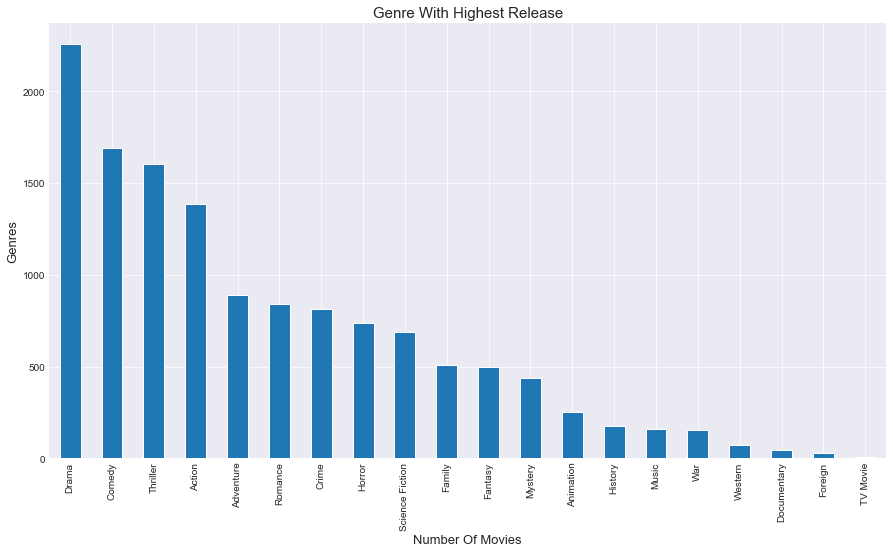

In [247]:
#plot a 'bar' plot using plot function for 'genre vs number of movies'.
fig = plt.figure(figsize=(15,8))
genres_vcount.plot(kind= 'bar')
#setup the title and the labels of the plot.
plt.title('Genre With Highest Release',fontsize=15)
plt.xlabel('Number Of Movies',fontsize=13)
plt.ylabel('Genres',fontsize= 13)

##### Findings

- Drama is the highest released movies genre followed by Comedy, Thriller and Action as the top 4 geners.

#### Who are the directors contributing to high revenue movies?

Text(0.5, 1.0, 'Top 10 Highest Revenue Directors')

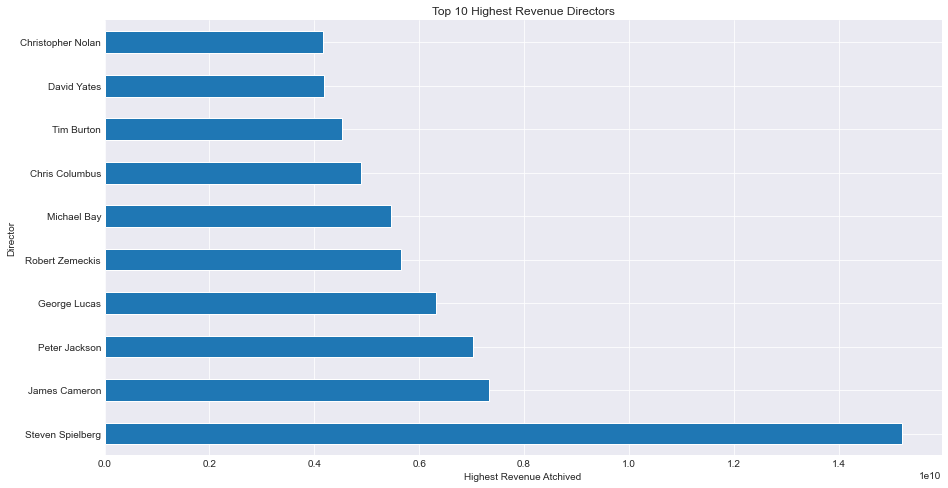

In [256]:
# Directors of the Highest Movie Revenue
dhmr_df = tmdb_df_cleaned.groupby('director').sum().sort_values(by = 'revenue_adj',ascending = False)['revenue_adj'][0:10]

#plot a 'brah' plot using plot function.
fig = plt.figure(figsize=(15,8))
dhmr_df.plot(kind='barh')
plt.style.use('seaborn-darkgrid')
plt.xlabel('Highest Revenue Atchived')
plt.ylabel('Director')
plt.title('Top 10 Highest Revenue Directors')

##### Findings

- Top 10 Directors in Achieving Highest Revenue (Ascending):
    - Steven Spielberg
    - James Cameron
    - Peter Jackson
    - George Lucas
    - Robert Zemeckis
    - Michael Bay
    - Chris Columbus
    - Tim Burton
    - David Yates
    - Christopher Nolan
    

### Research Question 2  (Important Insights for Movie Financing)

In this insight an important questions related to those who interested in financing movies like:
- What's the Changes in Budget & Revenue across Time?
- What's the most profitable genre?


#### What's the Changes in Budget & Revenue across Time?

Text(0.5, 1.0, 'Budget & Revenue over time')

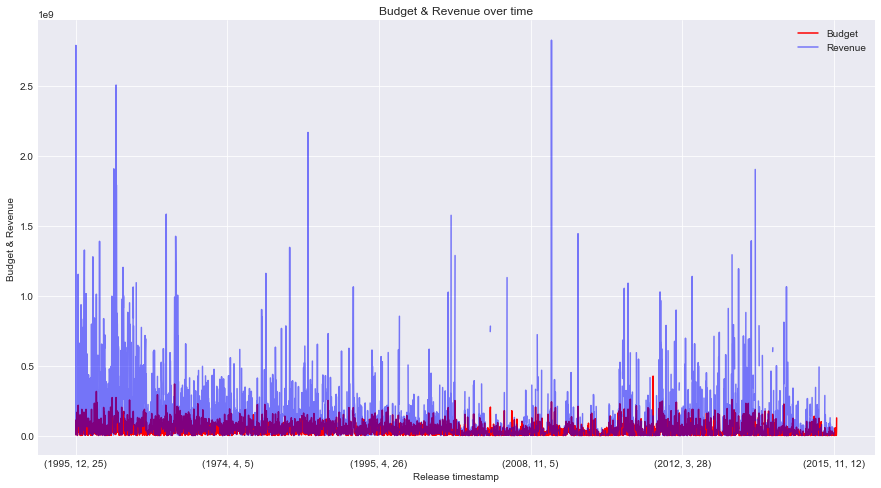

In [249]:
# Create copy of tmdb_df_cleaned to work off of using only my variables of interest
time_df = tmdb_df_cleaned[['release_year', 'release_month', 'release_day', 'budget_adj', 'revenue_adj']].copy()

# Set the index to be the timestamp so time is displayed properly in plots
time_df.set_index(['release_year', 'release_month', 'release_day'], inplace=True)

fig = plt.figure(figsize=(15,8))
time_df['budget_adj'].plot(color = 'red', label='Budget')
time_df['revenue_adj'].plot(color = 'blue', alpha=0.5, label='Revenue')
plt.style.use('seaborn-darkgrid')
plt.legend(loc='upper right')
plt.xlabel('Release timestamp')
plt.ylabel('Budget & Revenue')
plt.title('Budget & Revenue over time')

##### Findings

- Budget range kind of stable across time. However, Revenue changes from time to time.

#### What's the most profitable genre?

In [250]:
# Create new column for the profit to find out which movie is more successful. Make sure it is in integer datatype
df_cleaned = tmdb_df_cleaned.copy()
df_cleaned['profit'] = df_cleaned.apply(lambda x: x['revenue_adj'] - x['budget_adj'], axis=1)
df_cleaned.dropna(subset = ['profit'], inplace = True)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3804 entries, 8088 to 3460
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3804 non-null   int64  
 1   popularity            3804 non-null   float64
 2   original_title        3804 non-null   object 
 3   cast                  3804 non-null   object 
 4   director              3804 non-null   object 
 5   runtime               3804 non-null   int64  
 6   genres                3804 non-null   object 
 7   production_companies  3804 non-null   object 
 8   vote_count            3804 non-null   int64  
 9   vote_average          3804 non-null   float64
 10  budget_adj            3804 non-null   float64
 11  revenue_adj           3804 non-null   float64
 12  release_day           3804 non-null   int64  
 13  release_month         3804 non-null   int64  
 14  release_year          3804 non-null   int64  
 15  profit            

In [251]:
# Sort the data by profit and show the top 10 rows.
df_sorted = df_cleaned.sort_values(['profit'], ascending = False)
# Function definition of splitting the strings in genres.
def separate(data):
    return data.str[0:].str.split('|',expand = True)
genres = separate(df_sorted['genres'])
genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3804 entries, 1329 to 2244
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       3804 non-null   object
 1   1       3168 non-null   object
 2   2       2088 non-null   object
 3   3       861 non-null    object
 4   4       254 non-null    object
dtypes: object(5)
memory usage: 178.3+ KB


In [252]:
df_sorted['genres'] = genres[0]
df_sorted['genres'].head()

1329     Adventure
1386        Action
5231         Drama
10594        Drama
9806        Horror
Name: genres, dtype: object

Text(0, 0.5, 'Profit')

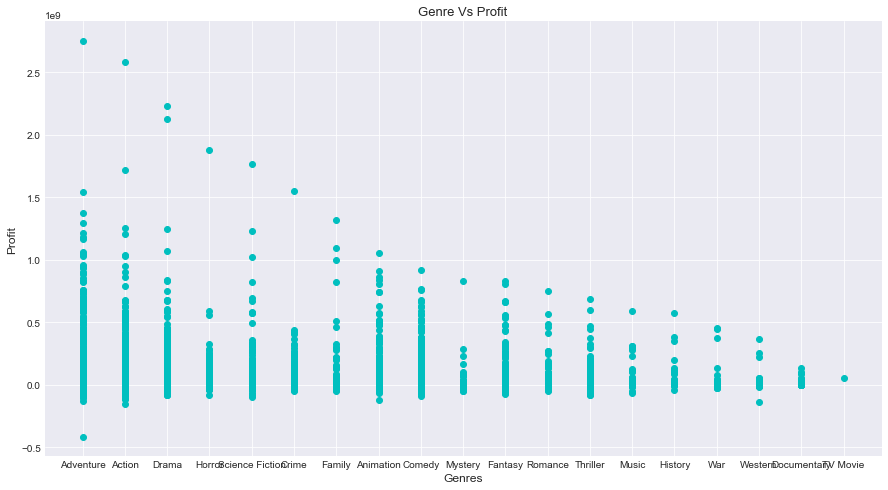

In [253]:
#plot a 'scatter' plot using plot function for 'genre vs profit'.
plt.figure(figsize=(15,8))
plt.scatter(x=df_sorted['genres'], y=df_sorted['profit'], color='c')

#setup the title and the labels of the scatter plot.
plt.style.use('seaborn-darkgrid')
plt.title('Genre Vs Profit', fontsize=13)
plt.xlabel('Genres', fontsize=12)
plt.ylabel('Profit', fontsize=12)

##### Findings

- Adventure Mmovies are the highest profitable movies genre followed by Action, Horror and Science Fiction as the top 4 most profitable geners.

### Research Question 3 (Important Insights for Movies Watching)

In this insight an important questions related to those who interested in watchingg movies like:
- Does movies ppopularity affected through the years?

#### Does movies ppopularity affected through the years?

In [254]:
# group data by release year take the median of all the numeric columns
groupby_year = tmdb_df_cleaned.groupby('release_year').median()

# get release year column back into dataframe for visualization
groupby_year['release_year'] = groupby_year.index.get_level_values(0)

Text(0, 0.5, 'Popularity')

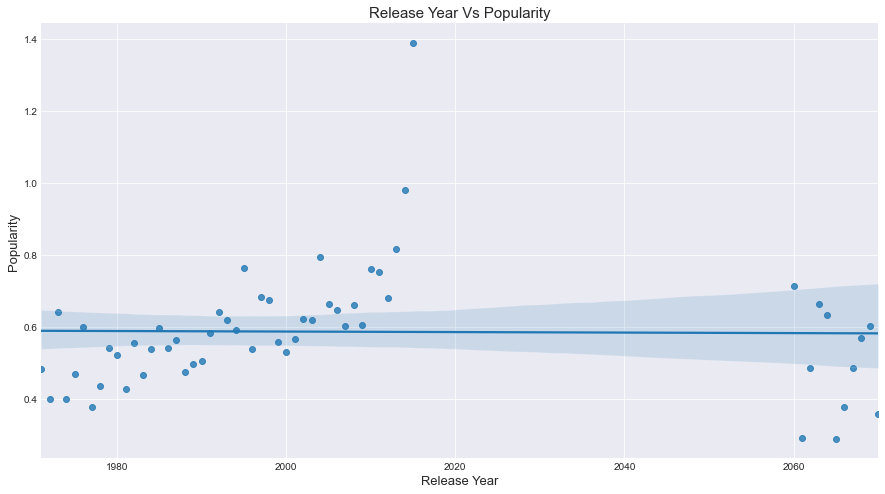

In [255]:
#plot a 'linear regression model' plot using plot function.
fig = plt.figure(figsize=(15,8))
sns.regplot(x = 'release_year', y = 'popularity', data = groupby_year)

#setup the title and the labels of the plot.
plt.title('Release Year Vs Popularity',fontsize=15)
plt.xlabel('Release Year',fontsize=13)
plt.ylabel('Popularity',fontsize= 13)

##### Findings

- It seems that popularity doesn't affected by the year

## Conclusions

- Data wrangling is a mandatory skill for who is working on data analysis.
- Data clean up implementation is not the hard thing but assessment the core of data analysis.
- Data should carefully be checked to be able to priortize what should be kept and what should be ignored.
- Data Gathering is valuable to know how to represent the data in useful form for the business sides.
- Data Cleaning is a very straight forward if assesment done properly.
- Data Storing is important for further analysis.
- Data analysis and visualization using packages is a good way of showing the result for businesses.

### Findings

- Important Insights for Movie Production
    - Drama is the highest released movies genre followed by Comedy, Thriller and Action as the top 4 geners.
    - Top 10 Directors in Achieving Highest Revenue (Ascending):
            - Steven Spielberg
            - James Cameron
            - Peter Jackson
            - George Lucas
            - Robert Zemeckis
            - Michael Bay
            - Chris Columbus
            - Tim Burton
            - David Yates
            - Christopher Nolan
- Important Insights for Movie Financing
    - Budget range kind of stable across time. However, Revenue changes from time to time.
    - Adventure Mmovies are the highest profitable movies genre followed by Action, Horror and Science Fiction as the top 4 most profitable geners.
- Important Insights for Movies Watching
    - It seems that popularity doesn't affected by the year